<a href="https://colab.research.google.com/github/mehrdadkazemi254/MachineLearning/blob/main/Chapter8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

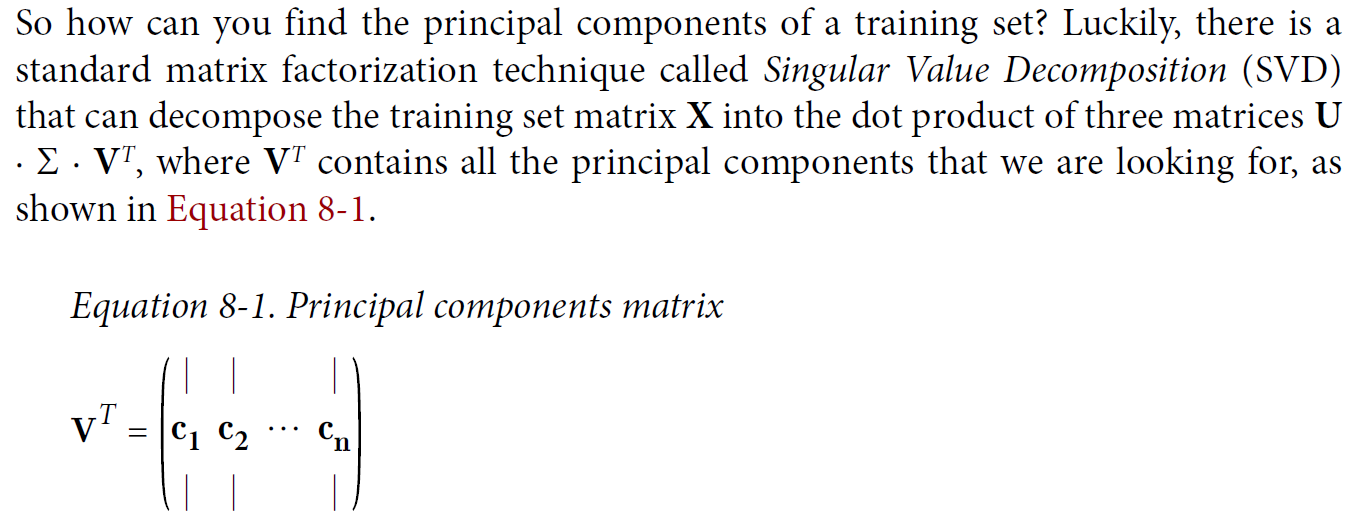

In [3]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
x = iris['data']
y = iris['target']

In [ ]:
#implementing PCA on our own 

x_centered = x - x.mean(axis=0) #axis=0 is columns, the average for each feature # we are centering the data
U, s, V = np.linalg.svd(x_centered)
c1 = V.T[:,0]
c2 = V.T[:,1]

In [ ]:
#projecting down to 2-D
w = V.T[:,:2] #c1,c2
x_2d = x_centered.dot(w)

In [ ]:
#doing PCA with sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
x2d = pca.fit_transform(x)

In [ ]:
pca.explained_variance_ratio_
#92.4% of the dataset's varience lies along the first axis and so on. overall using PCA for this dataset we can capture 97% of the dataset's varience

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

**Choosing the right number of dimensions**

In [ ]:
#1 manually
pca = PCA() #we dont specify the dimensions this time
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1 #d is not the index here, since we added one, d would be the n_components
d

2

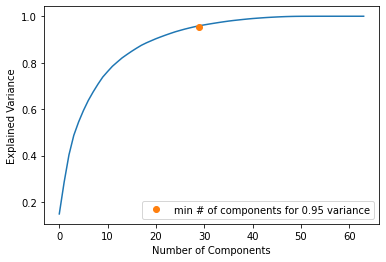

In [ ]:
#ploting the n_components vs. explained variance
from sklearn.datasets import load_digits
mnist = load_digits()
x_mnist = mnist.data
y_mnist = mnist.target
pca = PCA()
pca.fit(x_mnist)
Cumsum_mnist = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(Cumsum_mnist >=0.95)+1  #d-1:index d:n_components

plt.plot(Cumsum_mnist)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.plot(d,Cumsum_mnist[d-1],'o',label='min # of components for 0.95 variance')
plt.legend()
plt.show()

In [ ]:
#2 use sklearn
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)

In [ ]:
pca = PCA(n_components=20)
x_mnist_reduced = pca.fit_transform(x_mnist)
x_mnist_recovered = pca.inverse_transform(x_mnist_reduced)

**Incremental PCA**

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=15)
for batch in np.array_split(x_mnist, n_batches):
  inc_pca.partial_fit(batch)
x_reduced = inc_pca.transform(x_mnist)

#or use the np.memmap method

**Randomized PCA**

In [ ]:
rnd_pca = PCA(n_components=15, svd_solver='randomized')
x_reduced = rnd_pca.fit_transform(x_mnist)

**Kernel PCA**

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
x_reduced = rbf_pca.fit_transform(x)

In [ ]:
rbf_pca.get_params().keys()
#we use this list of names for reference in defining grid search paramaters
#we use __ to indicate the transformer in the pipeline
#ex: kernel__gamma referes to the gamma hyperparameter in the kernel in our pipeline (2 underscores __)

dict_keys(['alpha', 'coef0', 'copy_X', 'degree', 'eigen_solver', 'fit_inverse_transform', 'gamma', 'iterated_power', 'kernel', 'kernel_params', 'max_iter', 'n_components', 'n_jobs', 'random_state', 'remove_zero_eig', 'tol'])

In [ ]:
#selecting the best Kernel:
#1.compare the results for the task you want(e.g. classification) using grid search

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = Pipeline(steps=[('kpca', KernelPCA(n_components=2)),('lg_reg',LogisticRegression())])
grid_param = [{'kpca__gamma':np.linspace(0.03, 0.05, 10),
               'kpca__kernel':['rbf','sigmoid']  
               }]
grid_search = GridSearchCV(clf, grid_param, cv=3)
grid_search.fit(x,y)
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


In [ ]:
#2.reconstruction error
rbf_pca = KernelPCA(n_components=2, kernel='rbf',gamma=0.03, fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(x_mnist)
x_preimage = rbf_pca.inverse_transform(x_reduced)

from sklearn.metrics import mean_squared_error
mean_squared_error(x_mnist, x_preimage)

18.743988905546928

**Locally Linear Embedding (LLE)** is another nonlinear dimensionality reduction(NLDR) technique.

some other dimensionality reduction techniques:
1. Multidimensional Scaling(MDS)
2. Isomap
3. t-Distributed Stochastic Neighbor Embedding(t-SNE)
4. Linear Discriminant Analysis (LDA)

In [4]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
x_reduced = lle.fit_transform(x)